In [3]:
from sklearn import ensemble,  metrics 
from sklearn import datasets
import numpy as np
import pandas as pd

In [5]:

digits=datasets.load_digits()

In [6]:
data=digits.data
target=digits.target

In [7]:
target

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.metrics import roc_auc_score

In [9]:
from sklearn import tree

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [10]:
train_data, test_data, train_labels, test_labels = train_test_split(data,target,test_size=0.3)
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)
scoring = model_selection.cross_val_score(clf, data, target, 
                                                  cv = 10)

In [11]:
ans1=scoring.mean()
print ans1

0.8308624439503834


In [12]:
clf_bag=ensemble.BaggingClassifier(clf,n_estimators = 100)

In [13]:
clf_bag.fit(train_data, train_labels)
predictions_bag = clf_bag.predict(test_data)
scoring_bag = model_selection.cross_val_score(clf_bag, data, target, 
                                                  cv = 10)

In [14]:
ans2=scoring_bag.mean()
print ans2

0.9249208404275506


In [15]:
data.shape

(1797L, 64L)

In [16]:
target.shape

(1797L,)

In [17]:
clf_bag_sqrt=ensemble.BaggingClassifier(clf,n_estimators = 100,max_features=8)
clf_bag_sqrt.fit(train_data, train_labels)
predictions_bag_sqrt = clf_bag_sqrt.predict(test_data)
scoring_bag_sqrt = model_selection.cross_val_score(clf_bag_sqrt, data, target, 
                                                  cv = 10)
ans3=scoring_bag_sqrt.mean()
print ans3

0.9309810992115519


In [30]:
tree_model = tree.DecisionTreeClassifier(max_features=8)
bag_model2 = ensemble.BaggingClassifier(tree_model, n_estimators=100)
cv_score_bag2 = model_selection.cross_val_score(bag_model2, data, target, cv=10)

print(np.mean(cv_score_bag2))


0.9528131547385493


# Point 5

In [33]:
random_forest=ensemble.RandomForestClassifier(n_estimators = 100, max_features = 8)
cv_score_rf = model_selection.cross_val_score(random_forest, data, target, cv=10)

print(np.mean(cv_score_rf))

0.9527887679678253


Зависимость от кол-ва деревьев

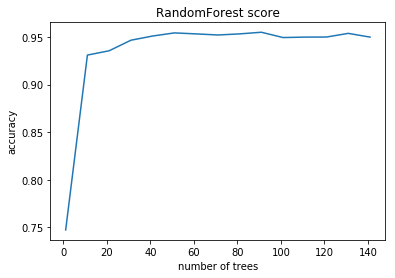

In [37]:
from matplotlib import pylab as plt
x = np.arange(1,150,10)
y=list()
for i in range(1,150,10):
    random_forest=ensemble.RandomForestClassifier(n_estimators = i, max_features = 8)
    cv_score_rf = model_selection.cross_val_score(random_forest, data, target, cv=10)
    y.append(np.mean(cv_score_rf))
plt.xlabel('number of trees')
plt.ylabel('accuracy')
plt.title('RandomForest score')
plt.plot(x,y)
plt.show()


Зависимость от количества признаков

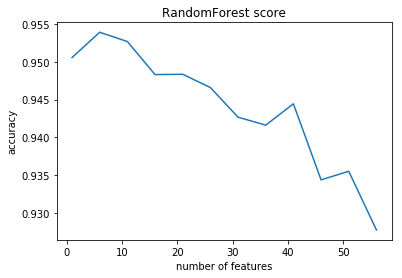

In [41]:
x = np.arange(1,60,5)
y=list()
for i in range(1,60,5):
    random_forest=ensemble.RandomForestClassifier(n_estimators = 100, max_features = i)
    cv_score_rf = model_selection.cross_val_score(random_forest, data, target, cv=10)
    y.append(np.mean(cv_score_rf))
plt.xlabel('number of features')
plt.ylabel('accuracy')
plt.title('RandomForest score')

plt.plot(x,y)
plt.show()

Зависимость от глубины деревьев

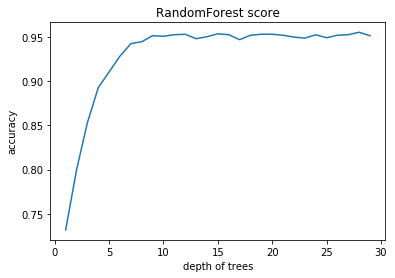

In [43]:
x = np.arange(1,30,1)
y=list()
for i in range(1,30,1):
    random_forest=ensemble.RandomForestClassifier(n_estimators = 100, max_features = 8, max_depth = i)
    cv_score_rf = model_selection.cross_val_score(random_forest, data, target, cv=10)
    y.append(np.mean(cv_score_rf))
plt.xlabel('depth of trees')
plt.ylabel('accuracy')
plt.title('RandomForest score')

plt.plot(x,y)
plt.show()